In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
RUN_SEP = '========================================='

def process_runs(results_file_name, params_to_extract):
  results = []
  with open(results_file_name, 'r') as file:
    content = file.read()
    runs = content.split(sep=RUN_SEP)
    
    for run in runs:
      scores_match = re.search('FeCAM top1 curve: (\[.*,.*,.*,.*,.*,.*\])', run)
      scores = np.array(eval(scores_match.group(1)))
      
      params = {}
      for param in params_to_extract:
        param_match = re.search(f'=>\s{param}:\s(.*)\\n', run)
        params[param] = param_match.group(1)
      
      results.append({ 'params': params, 'scores': scores })
            
  return results

In [3]:
results = process_runs('results/ocsvm/ocsvm_grid.txt', ['ocsvm_nu', 'ocsvm_gamma', 'ocsvm_kernel'])

In [4]:
nus = list(map(lambda x: x['params']['ocsvm_nu'], results))
gammas = list(map(lambda x: x['params']['ocsvm_gamma'], results))
kernels = list(map(lambda x: x['params']['ocsvm_kernel'], results))
scores = np.array(list(map(lambda x: x['scores'], results)))

In [6]:
df = pd.DataFrame({ 'Kernel': kernels, 'Nu': nus, 'Gamma': gammas })

for i in range(6):
  df[f'Task {i}'] = scores[:, i]

df['Mean'] = scores.mean(axis=1)

cols = pd.MultiIndex.from_tuples([
  ('PARAMS', 'Kernel'), ('PARAMS', 'Nu'), ('PARAMS', 'Gamma'),
  ('SCORES', 'Task 0'), ('SCORES', 'Task 1'), ('SCORES', 'Task 2'),
  ('SCORES', 'Task 3'), ('SCORES', 'Task 4'), ('SCORES', 'Task 5'),
  ('SCORES', 'Mean')  
])

df.columns = cols
df

PARAMS              SCORES                                              
      Kernel    Nu  Gamma Task 0 Task 1 Task 2 Task 3 Task 4 Task 5       Mean
0        rbf  0.01  0.001  57.96  29.32  23.21  20.05  17.96  15.73  27.371667
1       poly  0.01  0.001  80.40  67.00  57.43  50.29  44.32  39.94  56.563333
2    sigmoid  0.01  0.001  61.12  46.57  40.71  35.21  30.57  27.58  40.293333
3        rbf  0.01   0.01  56.80  29.52  23.19  20.01  17.92  15.76  27.200000
4       poly  0.01   0.01  80.40  67.00  57.43  50.29  44.32  39.94  56.563333
..       ...   ...    ...    ...    ...    ...    ...    ...    ...        ...
139     poly  0.99     10  82.44  68.70  58.89  51.52  45.80  41.22  58.095000
140  sigmoid  0.99     10  74.60  62.17  53.29  46.62  41.44  37.30  52.570000
141      rbf  0.99    100  73.78  65.65  60.53  55.79  52.06  49.15  59.493333
142     poly  0.99    100  82.44  68.70  58.89  51.52  45.80  41.22  58.095000
143  sigmoid  0.99    100   7.52   6.27   5.49   4.80   4.76   4.28   5.520000

[144 rows x 10 columns]

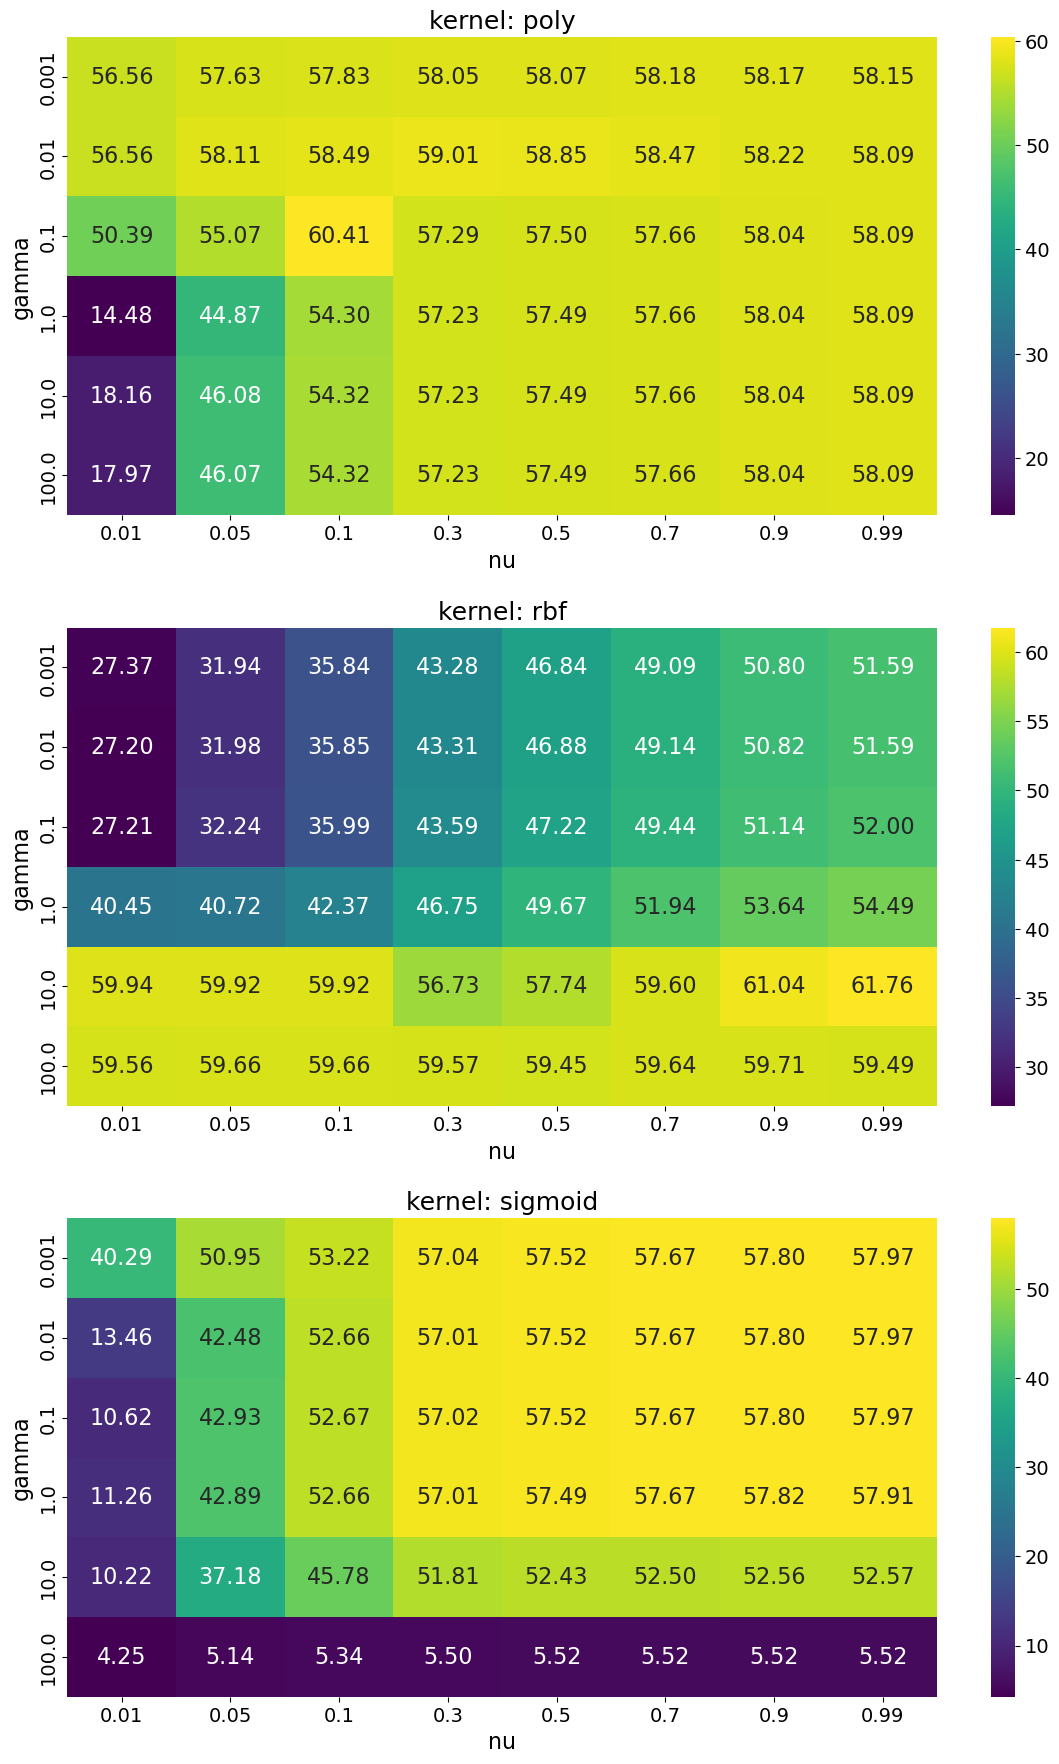

In [28]:
kernels = map(lambda result: result['params']['ocsvm_kernel'], results)
kernels = np.sort(np.unique(list(kernels)))

nus = map(lambda result: result['params']['ocsvm_nu'], results)
nus = map(lambda x: eval(x), nus)
nus = np.sort(np.unique(list(nus)))
nus = np.array(list(nus))

gammas = map(lambda result: result['params']['ocsvm_gamma'], results)
gammas = map(lambda x: eval(x), gammas)
gammas = np.sort(np.unique(list(gammas)))
gammas = np.array(list(gammas))

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, kernel in enumerate(kernels):
  kernel_results = filter(lambda x: x['params']['ocsvm_kernel'] == kernel, results)
  kernel_results = map(lambda x: x['scores'].mean(), kernel_results)
  kernel_results = map(lambda x: np.round(x, decimals=2), kernel_results)
  kernel_results = np.array(list(kernel_results))

  ax = sns.heatmap(kernel_results.reshape((len(nus), len(gammas))).T, 
                annot=True, annot_kws={"size": 16}, fmt=".2f", cmap="viridis",
                xticklabels=nus, yticklabels=gammas, ax=axes[i])
  
  ax.set_title(f'kernel: {kernel}', fontsize=18)
  ax.set_ylabel('gamma', fontsize=16)
  ax.set_xlabel('nu', fontsize=16)

  ax.tick_params(axis='x', labelsize=14)
  ax.tick_params(axis='y', labelsize=14)

  colorbar = ax.collections[0].colorbar
  colorbar.ax.tick_params(labelsize=14)
  colorbar.ax.yaxis.label.set_size(14)

plt.tight_layout(pad=2.0)  # Adjust the padding between and around the subplots
plt.show()

In [36]:
results = process_runs('results/ocsvm/ocsvm_rbf_grid_one_for_each.txt', ['ocsvm_nu', 'ocsvm_gamma', 'ocsvm_kernel'])

In [37]:
results

[{'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '60', 'ocsvm_kernel': 'rbf'},
  'scores': array([83.28, 70.93, 63.99, 57.91, 52.79, 49.01])}]

In [55]:
results = process_runs('results/ocsvm/ocsvm_rbf_one_for_all_grid.txt', ['ocsvm_nu', 'ocsvm_gamma', 'ocsvm_kernel'])

In [56]:
results

[{'params': {'ocsvm_nu': '0.99',
   'ocsvm_gamma': '0.0001',
   'ocsvm_kernel': 'rbf'},
  'scores': array([76.78, 56.1 , 50.09, 45.76, 41.94, 38.82])},
 {'params': {'ocsvm_nu': '0.99',
   'ocsvm_gamma': '0.001',
   'ocsvm_kernel': 'rbf'},
  'scores': array([76.78, 56.08, 50.09, 45.78, 41.96, 38.83])},
 {'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '0.01', 'ocsvm_kernel': 'rbf'},
  'scores': array([76.74, 56.08, 50.13, 45.79, 41.97, 38.84])},
 {'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '0.1', 'ocsvm_kernel': 'rbf'},
  'scores': array([77.3 , 56.57, 50.53, 46.16, 42.32, 39.15])},
 {'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '1', 'ocsvm_kernel': 'rbf'},
  'scores': array([79.74, 59.27, 53.1 , 48.65, 44.76, 41.44])},
 {'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '3', 'ocsvm_kernel': 'rbf'},
  'scores': array([81.62, 63.08, 56.46, 51.71, 47.57, 44.08])},
 {'params': {'ocsvm_nu': '0.99', 'ocsvm_gamma': '5', 'ocsvm_kernel': 'rbf'},
  'scores': array([82.28, 65.22, 58.71, 53.9 , 49.4

In [57]:
scores = np.array(list(map(lambda x: x['scores'], results)))

nus = map(lambda result: result['params']['ocsvm_nu'], results)
nus = map(lambda x: eval(x), nus)
nus = np.sort(np.unique(list(nus)))
nus = np.array(list(nus))

gammas = map(lambda result: result['params']['ocsvm_gamma'], results)
gammas = map(lambda x: eval(x), gammas)
gammas = np.sort(np.unique(list(gammas)))
gammas = np.array(list(gammas))

In [59]:
gammas

array([1.00e-04, 1.00e-03, 1.00e-02, 1.00e-01, 1.00e+00, 3.00e+00,
       5.00e+00, 8.00e+00, 9.00e+00, 9.50e+00, 1.00e+01, 1.05e+01,
       1.10e+01, 1.20e+01, 1.50e+01, 1.70e+01, 2.00e+01, 3.00e+01,
       4.00e+01, 5.00e+01, 6.00e+01])

In [60]:
nus

array([0.99])

In [61]:
df = pd.DataFrame({ 'Gamma': gammas })

for i in range(6):
  df[f'Task {i}'] = scores[:, i]

df['Mean'] = scores.mean(axis=1)

cols = pd.MultiIndex.from_tuples([
  ('PARAMS', 'Gamma'),
  ('SCORES', 'Task 0'), ('SCORES', 'Task 1'), ('SCORES', 'Task 2'),
  ('SCORES', 'Task 3'), ('SCORES', 'Task 4'), ('SCORES', 'Task 5'),
  ('SCORES', 'Mean')  
])

df.columns = cols
df

PARAMS SCORES                                              
      Gamma Task 0 Task 1 Task 2 Task 3 Task 4 Task 5       Mean
0    0.0001  76.78  56.10  50.09  45.76  41.94  38.82  51.581667
1    0.0010  76.78  56.08  50.09  45.78  41.96  38.83  51.586667
2    0.0100  76.74  56.08  50.13  45.79  41.97  38.84  51.591667
3    0.1000  77.30  56.57  50.53  46.16  42.32  39.15  52.005000
4    1.0000  79.74  59.27  53.10  48.65  44.76  41.44  54.493333
5    3.0000  81.62  63.08  56.46  51.71  47.57  44.08  57.420000
6    5.0000  82.28  65.22  58.71  53.90  49.44  45.89  59.240000
7    8.0000  82.74  67.45  60.70  55.68  51.16  47.62  60.891667
8    9.0000  82.76  67.85  61.23  56.18  51.76  48.09  61.311667
9    9.5000  82.88  68.13  61.60  56.50  52.07  48.36  61.590000
10  10.0000  82.92  68.38  61.79  56.64  52.26  48.56  61.758333
11  10.5000  82.96  68.53  62.00  56.91  52.52  48.79  61.951667
12  11.0000  82.98  68.68  62.14  57.01  52.69  49.01  62.085000
13  12.0000  83.00  68.98  62.54  57.36  53.03  49.38  62.381667
14  15.0000  83.14  69.95  63.49  58.19  53.86  50.29  63.153333
15  17.0000  83.28  70.35  64.10  58.76  54.51  51.06  63.676667
16  20.0000  83.24  70.68  64.71  59.41  55.03  51.77  64.140000
17  30.0000  83.24  72.03  66.00  60.79  56.37  53.02  65.241667
18  40.0000  83.04  72.48  66.60  61.44  57.16  53.97  65.781667
19  50.0000  82.64  72.45  66.77  61.65  57.46  54.25  65.870000
20  60.0000  81.56  71.92  66.39  61.26  57.11  53.99  65.371667

In [72]:
np.set_printoptions(suppress=True, precision=6)
df['PARAMS']['Gamma'].to_numpy()

array([ 0.0001,  0.001 ,  0.01  ,  0.1   ,  1.    ,  3.    ,  5.    ,
        8.    ,  9.    ,  9.5   , 10.    , 10.5   , 11.    , 12.    ,
       15.    , 17.    , 20.    , 30.    , 40.    , 50.    , 60.    ])

In [62]:
df.round(2).to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & PARAMS & \\multicolumn{7}{r}{SCORES} \\\\\n & Gamma & Task 0 & Task 1 & Task 2 & Task 3 & Task 4 & Task 5 & Mean \\\\\n\\midrule\n0 & 0.000000 & 76.780000 & 56.100000 & 50.090000 & 45.760000 & 41.940000 & 38.820000 & 51.580000 \\\\\n1 & 0.000000 & 76.780000 & 56.080000 & 50.090000 & 45.780000 & 41.960000 & 38.830000 & 51.590000 \\\\\n2 & 0.010000 & 76.740000 & 56.080000 & 50.130000 & 45.790000 & 41.970000 & 38.840000 & 51.590000 \\\\\n3 & 0.100000 & 77.300000 & 56.570000 & 50.530000 & 46.160000 & 42.320000 & 39.150000 & 52.000000 \\\\\n4 & 1.000000 & 79.740000 & 59.270000 & 53.100000 & 48.650000 & 44.760000 & 41.440000 & 54.490000 \\\\\n5 & 3.000000 & 81.620000 & 63.080000 & 56.460000 & 51.710000 & 47.570000 & 44.080000 & 57.420000 \\\\\n6 & 5.000000 & 82.280000 & 65.220000 & 58.710000 & 53.900000 & 49.440000 & 45.890000 & 59.240000 \\\\\n7 & 8.000000 & 82.740000 & 67.450000 & 60.700000 & 55.680000 & 51.160000 & 47.620000 & 60.890000 \\\\\n8 